# Part I - (Dataset Exploration: Loan Data From Prosper)

## by (Praise Ekeopara)

## Introduction

> This data set contains `113,937 loans` with `81 variables` on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The [data dictionary](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0) explains the variables in the data set. However, the focus of the exploration will be about about 10-15 of these variables or features in the data.

## Preliminary Wrangling

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [3]:
loan_data = pd.read_csv('prosperLoanData.csv') # load the data

In [4]:
loan_data.head() # overview of the data

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
loan_data.shape # check the shape

(113937, 81)

In [6]:
# select data of interest
loan = loan_data[['ListingKey', 'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate', 'Occupation', 'EmploymentStatus', 
                  'IncomeRange', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Investors', 'LP_CustomerPayments',
                  'LP_CustomerPrincipalPayments', 'LP_InterestandFees']]

In [7]:
loan.head(1)

,ListingKey,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,1021339766868145413AB3B,36,Completed,2009-08-14 00:00:00,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


### What is the structure of your dataset?

> Rows = 113937
Columns = 81

### What is/are the main feature(s) of interest in your dataset?

> 1. `Term`: The length of the loan expressed in months 

> 2. `LoanStatus`: The current status of the loan: Cancelled, Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The 
PastDue status will be accompanied by a delinquency bucket.

> 3. `ClosedDate`: Closed date is applicable for Cancelled, Completed, Chargedoff and Defaulted loan statuses. 

> 4. `BorrowerAPR`: The Borrower's Annual Percentage Rate (APR) for the loan.

> 5. `BorrowerRate`: The Borrower's interest rate for this loan. 

> 6. `Occupation`: The Occupation selected by the Borrower at the time they created the listing.

> 7. `EmploymentStatus`: The employment status of the borrower at the time they posted the listing

> 8. `IncomeRange`: The income range of the borrower at the time the listing was created.

> 9. `LoanOriginalAmount`: The origination amount of the loan.

> 10. `MonthlyLoanPayment`: The scheduled monthly loan payment.

> 11. `LP_CustomerPayments`: Pre charge-off cumulative gross payments made by the borrower on the loan. If the loan has charged off, this value will exclude 
any recoveries

> 12. `LP_CustomerPrincipalPayments`: Pre charge-off cumulative principal payments made by the borrower on the loan. If the loan has charged off, this value will exclude 
any recoveries.

> 13. `LP_InterestandFees`: Pre charge-off cumulative interest and fees paid by the borrower. If the loan has charged off, this value will exclude any 
recoveries.

> 14. `Investors`: The number of investors that funded the loan.

## Data Quality Assessment & Cleaning

### 1. Missing data Percentage

In [8]:
round((loan.isnull().sum() / loan.shape[0]) * 100, 2)

ListingKey                       0.00
Term                             0.00
LoanStatus                       0.00
ClosedDate                      51.65
BorrowerAPR                      0.02
BorrowerRate                     0.00
Occupation                       3.15
EmploymentStatus                 1.98
IncomeRange                      0.00
LoanOriginalAmount               0.00
MonthlyLoanPayment               0.00
Investors                        0.00
LP_CustomerPayments              0.00
LP_CustomerPrincipalPayments     0.00
LP_InterestandFees               0.00
dtype: float64

- It appears that the `ClosedDate` feature has 51.65% of its features are all missing. Most likely this feature maybe dropped as no reference date is associated with it.
- Other features with very small rates will be left for now unless there is need to address their missing values.

In [9]:
loan = loan.drop('ClosedDate', axis=1) # dropping the 'ClosedDate' feature
loan.dropna(axis=0, inplace=True);

In [10]:
loan.head(1) # check

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,1021339766868145413AB3B,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


In [11]:
loan

,ListingKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,1021339766868145413AB3B,36,Completed,0.16516,0.1580,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.1400,9425.00,1971.1400
1,10273602499503308B223C1,36,Current,0.12016,0.0920,Professional,Employed,"$50,000-74,999",10000,318.93,1,0.0000,0.00,0.0000
2,0EE9337825851032864889A,36,Completed,0.28269,0.2750,Other,Not available,Not displayed,3001,123.32,41,4186.6300,3001.00,1185.6300
3,0EF5356002482715299901A,36,Current,0.12528,0.0974,Skilled Labor,Employed,"$25,000-49,999",10000,321.45,158,5143.2000,4091.09,1052.1100
4,0F023589499656230C5E3E2,36,Current,0.24614,0.2085,Executive,Employed,"$100,000+",15000,563.97,20,2819.8500,1563.22,1256.6300
5,0F05359734824199381F61D,60,Current,0.15425,0.1314,Professional,Employed,"$100,000+",15000,342.37,1,679.3400,351.89,327.4500
6,0F0A3576754255009D63151,36,Current,0.31032,0.2712,Sales - Retail,Employed,"$25,000-49,999",3000,122.67,1,1226.7000,604.25,622.4500
7,0F1035772717087366F9EA7,36,Current,0.23939,0.2019,Laborer,Employed,"$25,000-49,999",10000,372.60,1,3353.4000,1955.89,1397.5100
8,0F043596202561788EA13D5,36,Current,0.07620,0.0629,Food Service,Employed,"$25,000-49,999",10000,305.54,1,611.0800,505.58,105.5000
9,0F043596202561788EA13D5,36,Current,0.07620,0.0629,Food Service,Employed,"$25,000-49,999",10000,305.54,1,611.0800,505.58,105.5000


### 2. Data types

In [12]:
loan.dtypes # checking data types

ListingKey                       object
Term                              int64
LoanStatus                       object
BorrowerAPR                     float64
BorrowerRate                    float64
Occupation                       object
EmploymentStatus                 object
IncomeRange                      object
LoanOriginalAmount                int64
MonthlyLoanPayment              float64
Investors                         int64
LP_CustomerPayments             float64
LP_CustomerPrincipalPayments    float64
LP_InterestandFees              float64
dtype: object

All data types are correctly defined. Hence, no corrections are to be made for now.

### 3. Check for duplicate rows

In [13]:
loan['ListingKey'].duplicated().sum() # checking for duplicates

812

There are 871 duplicated rows based on the `ListingKey` feature, hence these duplicates will be dropped so as to avoid any unbiased analysis

In [14]:
loan = loan.drop_duplicates(keep='first', subset='ListingKey')

In [15]:
loan['ListingKey'].duplicated().sum() # checking for duplicates

0

In [16]:
loan = loan.drop('ListingKey', axis=1) # dropping the 'ListingKey' feature

### 4. Checkng for data errors

In [17]:
loan.EmploymentStatus.unique()

array(['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
       'Not employed', 'Part-time', 'Retired'], dtype=object)

In [18]:
loan.IncomeRange.unique()

array(['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
       '$75,000-99,999', '$1-24,999', 'Not employed', '$0'], dtype=object)

**Observation**
- This shows that both the `EmploymentStatus` and the `IncomeRange` need to be corrected by removing some of their data values such as; 'Not available', 'Not employed' and '$0'

In [19]:
#Using drop() to delete rows based on column value
income_drop = ['Not employed', '$0']
loan.drop(loan[loan['EmploymentStatus'] == 'Not available'].index, inplace = True)
for val in income_drop:
    loan.drop(loan[loan['IncomeRange'] == val].index, inplace = True)

In [20]:
# to check
loan.IncomeRange.unique(), loan.EmploymentStatus.unique()

(array(['$25,000-49,999', '$50,000-74,999', '$100,000+', '$75,000-99,999',
        '$1-24,999', 'Not displayed'], dtype=object),
 array(['Self-employed', 'Employed', 'Full-time', 'Other', 'Part-time',
        'Retired', 'Not employed'], dtype=object))

## Univariate Exploration

> Here, we investigate distributions of individual variables.

In [21]:
loan.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


### 1.  What is the destribution of the Amount of Loan?

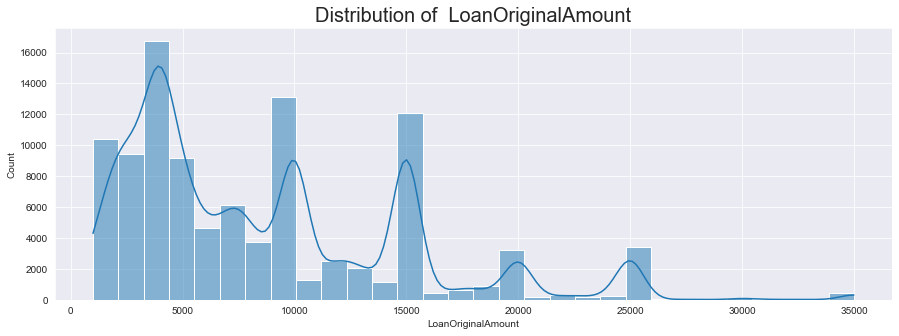

In [22]:
def histoplot(data, x):
    plt.figure(figsize = (15, 5), facecolor = None)
    sns.set_style("darkgrid")
    plt.title("Distribution of " + " " + x, fontsize=20)
    sns.histplot(data=data, bins=30, x=x, kde=True);
    
histoplot(loan, "LoanOriginalAmount")

> ### Observations
- It appears that the Loan amount is positively skewed (skewed to the right)
- Most frequent loans are over 16,000 dollars
- The highest loan appears to be $35,000

### 2. What is the highest Loan Status recorded?

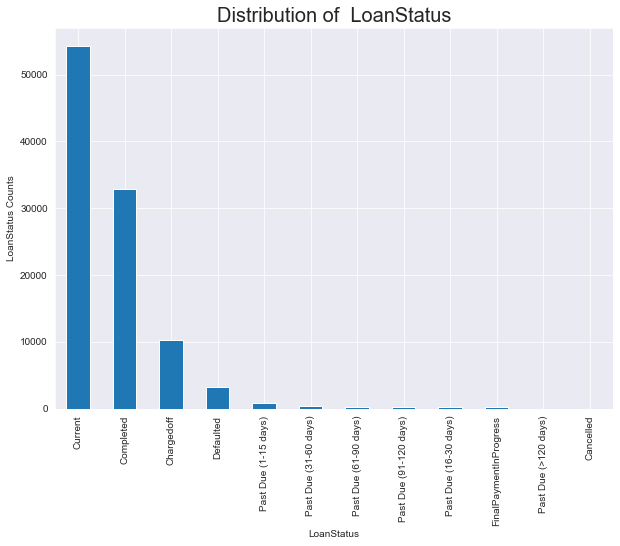

In [23]:
def count_plot(data, x, kind, figsize):
    plt.figure(figsize = figsize, facecolor = None)
    plt.title("Distribution of " + " " + x, fontsize=20)
    sns.set_style("darkgrid")
    if kind == 'barh':
        plt.xlabel(x + " " + 'Counts')
        plt.ylabel(x)
    else:
        plt.ylabel(x + " " + 'Counts')
        plt.xlabel(x)
    data[x].value_counts().plot(kind=kind);

count_plot(loan, 'LoanStatus', 'bar', (10, 7))

> ### Observations
- The **Current** loan status recorded the highest, followed by **Completed**.

### 3. What are the Possible Occupations of the borrowers?

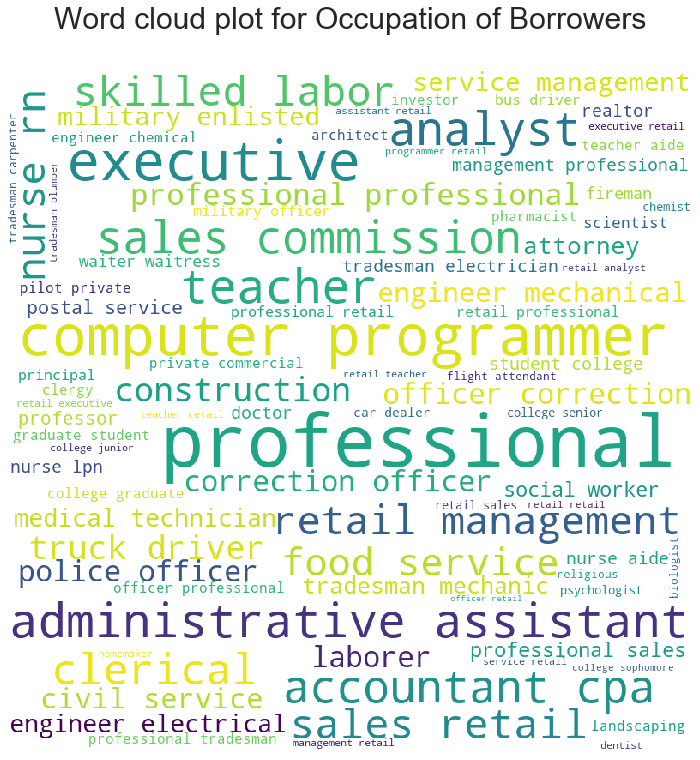

In [24]:
words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in loan.Occupation:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (10, 15), facecolor = None)
plt.imshow(wordcloud)
plt.title("Word cloud plot for Occupation of Borrowers\n", fontsize=30)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

> ### Observations
* As can be seen, the possible occupations of borrowers are; 
  - Professionals
  - Computer programmer
  - Excutive
  - Administrative assistant
  - Analyt etc.

### 4. What are the Employement status of the borrowers?

In [25]:
loan.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


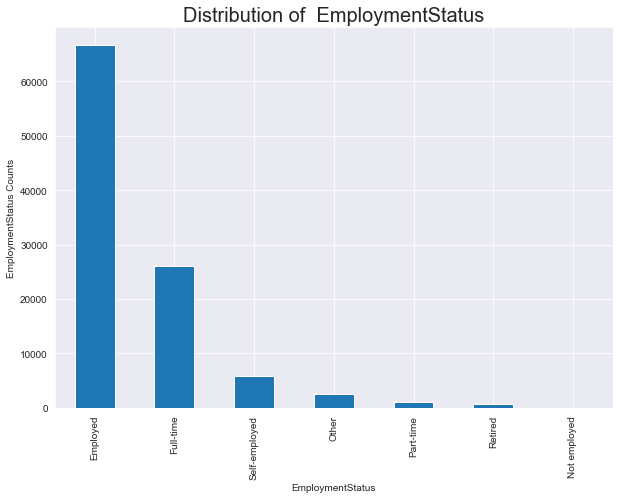

In [26]:
count_plot(loan, 'EmploymentStatus', 'bar', (10, 7))

> ### Observations
- The highest borrowers are those who are **Employed**, while those with **Retired** status borrow the least.

### 5. What is the most frequent Income ranges of the borrowers?

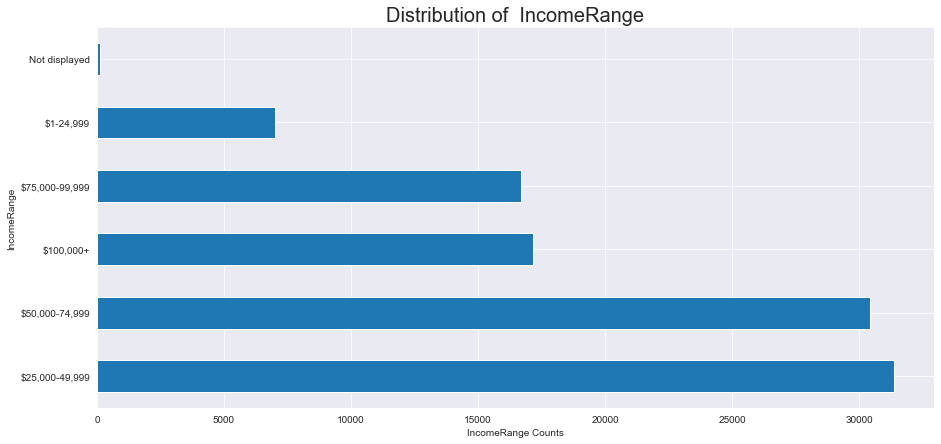

In [27]:
count_plot(loan, 'IncomeRange', 'barh', (15, 7))

> ### Observations
- The most frequent income ranges is between $25,000 - 49,999

### 6. Are there features with outliers?

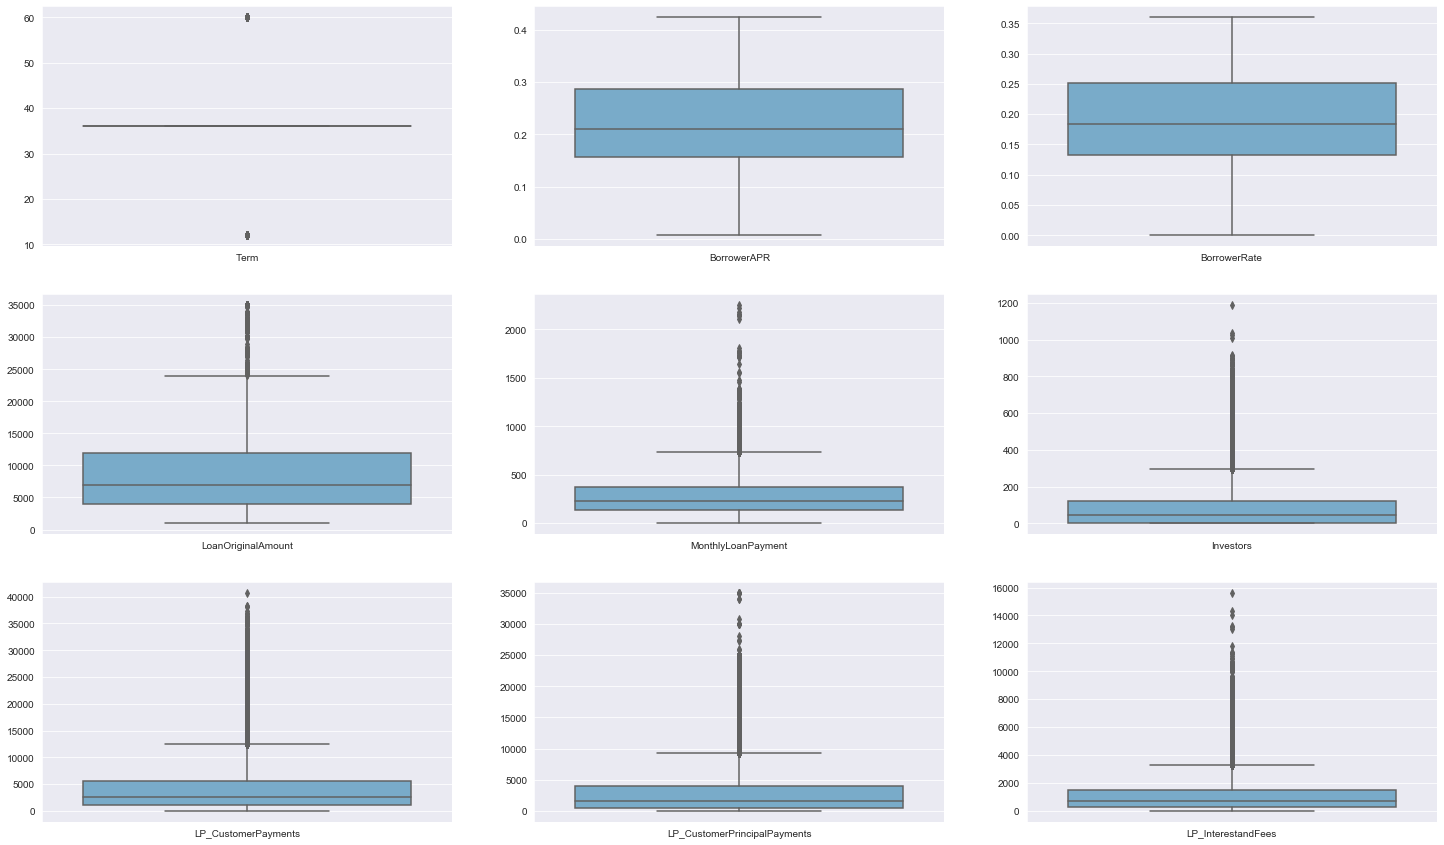

In [28]:
numeric_df = loan.select_dtypes(include='number') # select numeric data types

plt.figure(figsize=(25, 15))

plt.subplot(3, 3, 1)
sns.boxplot(data=numeric_df[['Term']], palette = "Blues_r")

plt.subplot(3, 3, 2)
sns.boxplot(data=numeric_df[['BorrowerAPR']], palette = "Blues_r")

plt.subplot(3, 3, 3)
sns.boxplot(data=numeric_df[['BorrowerRate']], palette = "Blues_r")

plt.subplot(3, 3, 4)
sns.boxplot(data=numeric_df[['LoanOriginalAmount']], palette = "Blues_r")

plt.subplot(3, 3, 5)
sns.boxplot(data=numeric_df[['MonthlyLoanPayment']], palette = "Blues_r")

plt.subplot(3, 3, 6)
sns.boxplot(data=numeric_df[['Investors']], palette = "Blues_r")

plt.subplot(3, 3, 7)
sns.boxplot(data=numeric_df[['LP_CustomerPayments']], palette = "Blues_r")

plt.subplot(3, 3, 8)
sns.boxplot(data=numeric_df[['LP_CustomerPrincipalPayments']], palette = "Blues_r")

plt.subplot(3, 3, 9)
sns.boxplot(data=numeric_df[['LP_InterestandFees']], palette = "Blues_r");

> ### Observations
Features with outliers include;
- Term, LoanOriginalAmount, MonthlyLoanPayment, Investors, LP_CustomerPayments, LP_CustomerPrincipalPayments, and LP_InterestandFees

> Features without outliers include;
- 'BorrowerAPR', 'BorrowerRate'

### 7. What are the distributions of numerical features?

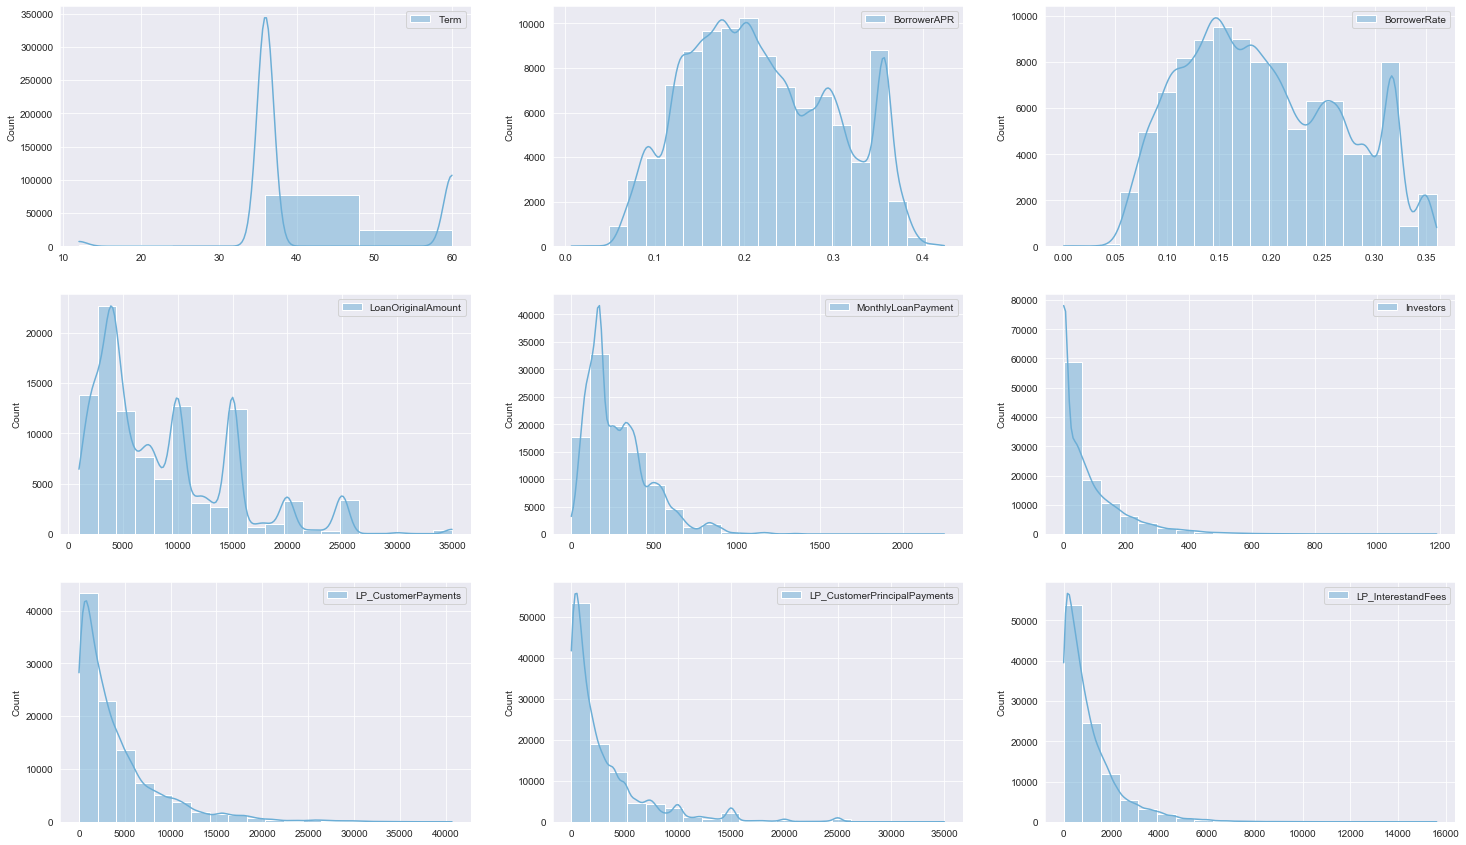

In [29]:
numeric_df = loan.select_dtypes(include='number') # select numeric data types

plt.figure(figsize=(25, 15))

plt.subplot(3, 3, 1)
sns.histplot(data=numeric_df[['Term']], bins=4, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 2)
sns.histplot(data=numeric_df[['BorrowerAPR']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 3)
sns.histplot(data=numeric_df[['BorrowerRate']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 4)
sns.histplot(data=numeric_df[['LoanOriginalAmount']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 5)
sns.histplot(data=numeric_df[['MonthlyLoanPayment']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 6)
sns.histplot(data=numeric_df[['Investors']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 7)
sns.histplot(data=numeric_df[['LP_CustomerPayments']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 8)
sns.histplot(data=numeric_df[['LP_CustomerPrincipalPayments']], bins=20, kde=True, palette = "Blues_r")

plt.subplot(3, 3, 9)
sns.histplot(data=numeric_df[['LP_InterestandFees']], bins=20, kde=True, palette = "Blues_r");

> ### Observations
- The LoanOriginalAmount, MonthlyLoanPayment, Investors, LP_CustomerPayments, LP_CustomerPrincipalPayments, and LP_InterestandFees are positively skewed. 
- While the Term, BorrowerAPR and the BorrowerRate tend to be slightly normally distributed.

## Bivariate Exploration

> In this section, we investigate relationships between pairs of variables in the data. 

### 8. Which occupation type borrows the most?

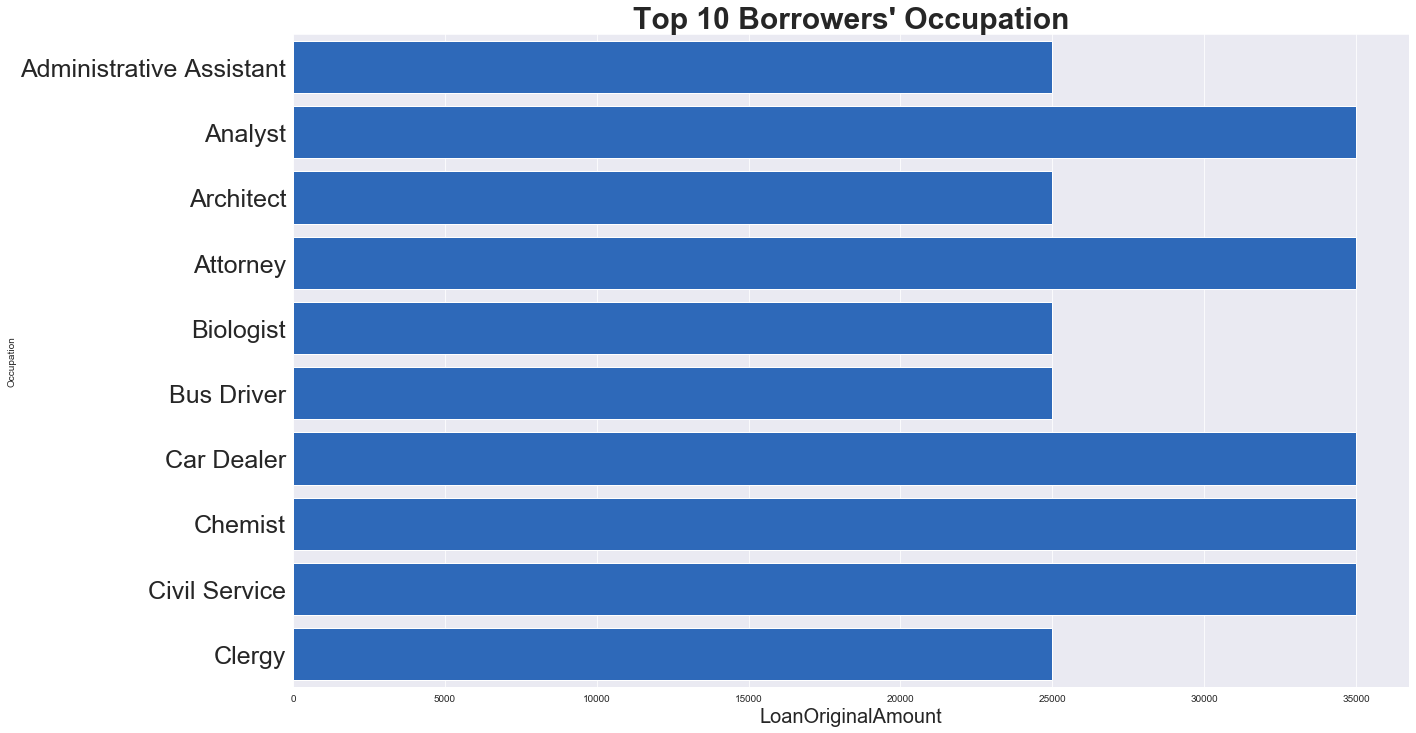

In [30]:
def top10_barplot(data, feature):
    plt.figure(figsize=(20, 12))
    loanSum_df = loan.groupby(feature)['LoanOriginalAmount'].max()[1:11].reset_index()
    ax = sns.barplot(data=loanSum_df, y=feature, x='LoanOriginalAmount', color='#1765D0')
    plt.xlabel('LoanOriginalAmount', fontsize=20)
    ax.set_title(f'Top 10 Borrowers\' {feature}', fontweight='bold', fontsize=30)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25);
                 
top10_barplot(loan, 'Occupation')

> ### Observations
- It appears that amongst the top 10 borrowers' occupations, four occupation namely; `Analyst`, `Attorney`, `Car Dealer`, and `Chemist`, happen to borrow loans of $35,000.

### 9. Which income range borrows the highest loan?

In [31]:
loan.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


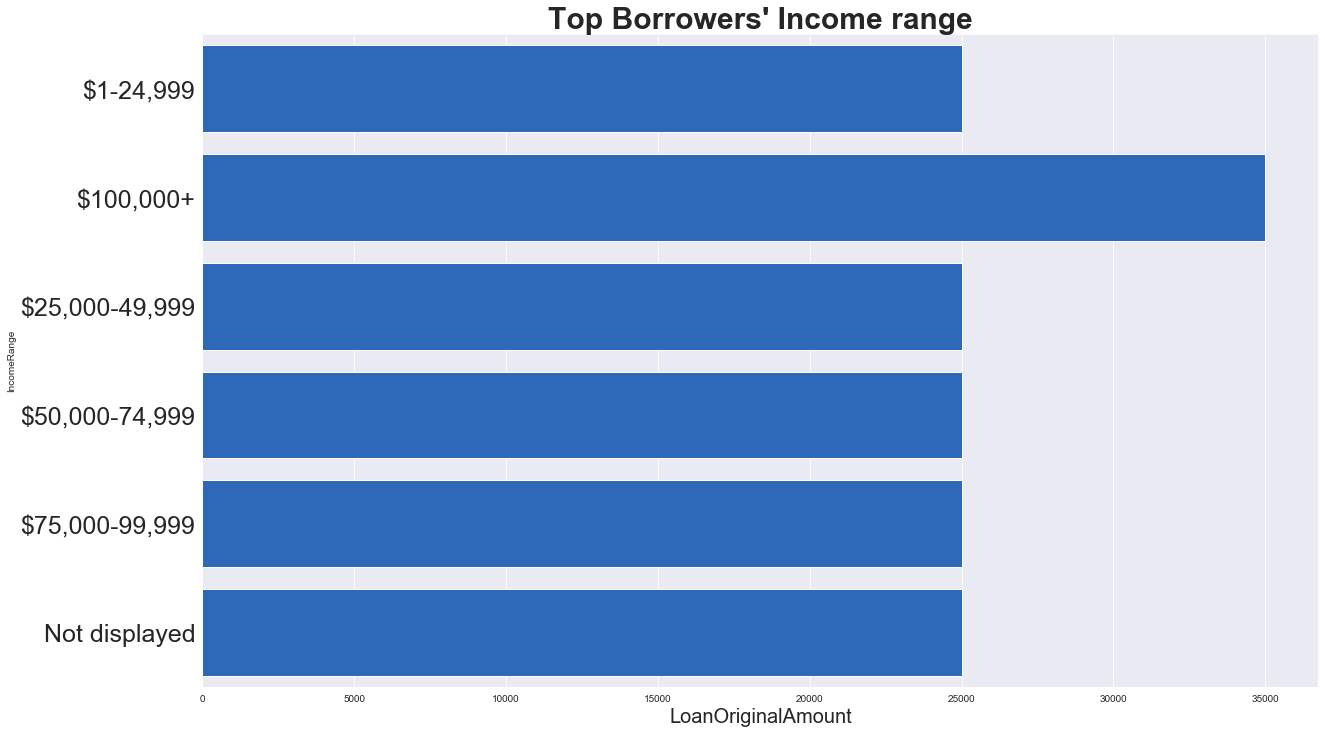

In [32]:
plt.figure(figsize=(20, 12))
loanSum_df = loan.groupby('IncomeRange')['LoanOriginalAmount'].max().reset_index()
ax = sns.barplot(data=loanSum_df, y='IncomeRange', x='LoanOriginalAmount', color='#1765D0')
plt.xlabel('LoanOriginalAmount', fontsize=20)
ax.set_title('Top Borrowers\' Income range', fontweight='bold', fontsize=30)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 25);

> ### Observations
- People with over $100,000 income ranges tend to borrow highest loans. 
- Also, equal loans are borrowed across all income ranges

### 10. Are Borrowers with higher rates enjoying longer loan payment Terms?

In [33]:
loan.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


**Note**: For we to make a violin plot for Loan amount against Term, we need to change the data type of Term into string.

In [34]:
loan['Term'] = loan['Term'].astype(str)

In [35]:
loan.dtypes # checking

Term                             object
LoanStatus                       object
BorrowerAPR                     float64
BorrowerRate                    float64
Occupation                       object
EmploymentStatus                 object
IncomeRange                      object
LoanOriginalAmount                int64
MonthlyLoanPayment              float64
Investors                         int64
LP_CustomerPayments             float64
LP_CustomerPrincipalPayments    float64
LP_InterestandFees              float64
dtype: object

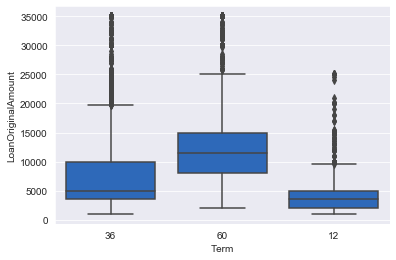

In [36]:
sns.boxplot(data=loan, x='Term', y='LoanOriginalAmount', color='#1765D0');

> ### Observations
Figure above shows that the borrower's rates increase across the various Terms (12, 36, 60). However, it appears that the higher rates were recorded for the 36 Term.

In [37]:
def scatterplot(data, x, y):
    ax = sns.boxplot(data=loan, x=x, y=y, color='#1765D0')
    plt.title(f"Plot of {y} against {x}", fontsize=14)
    plt.ylabel(x, fontsize=14)
    plt.xlabel(y, fontsize=14);
    
#scatterplot(loan, 'BorrowerRate', 'Term')

In [38]:
loan['MonthlyLoanPayment'].nunique()

21824

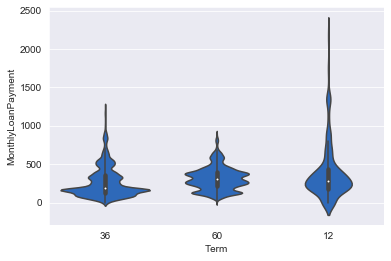

In [39]:
sns.violinplot(data=loan, x='Term', y='MonthlyLoanPayment', color='#1765D0');

In [40]:
# sns.kdeplot(data=loan, x='Investors', y='LoanOriginalAmount', cmap="Reds", shade=True) #, hue='Term', s=10);

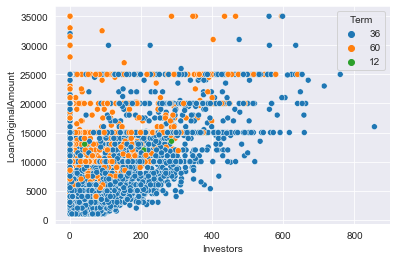

In [41]:
x = loan['Investors'].sample(30000)
y = loan['LoanOriginalAmount'].sample(30000)

sns.scatterplot(data=loan, x=x, y=y, hue='Term')

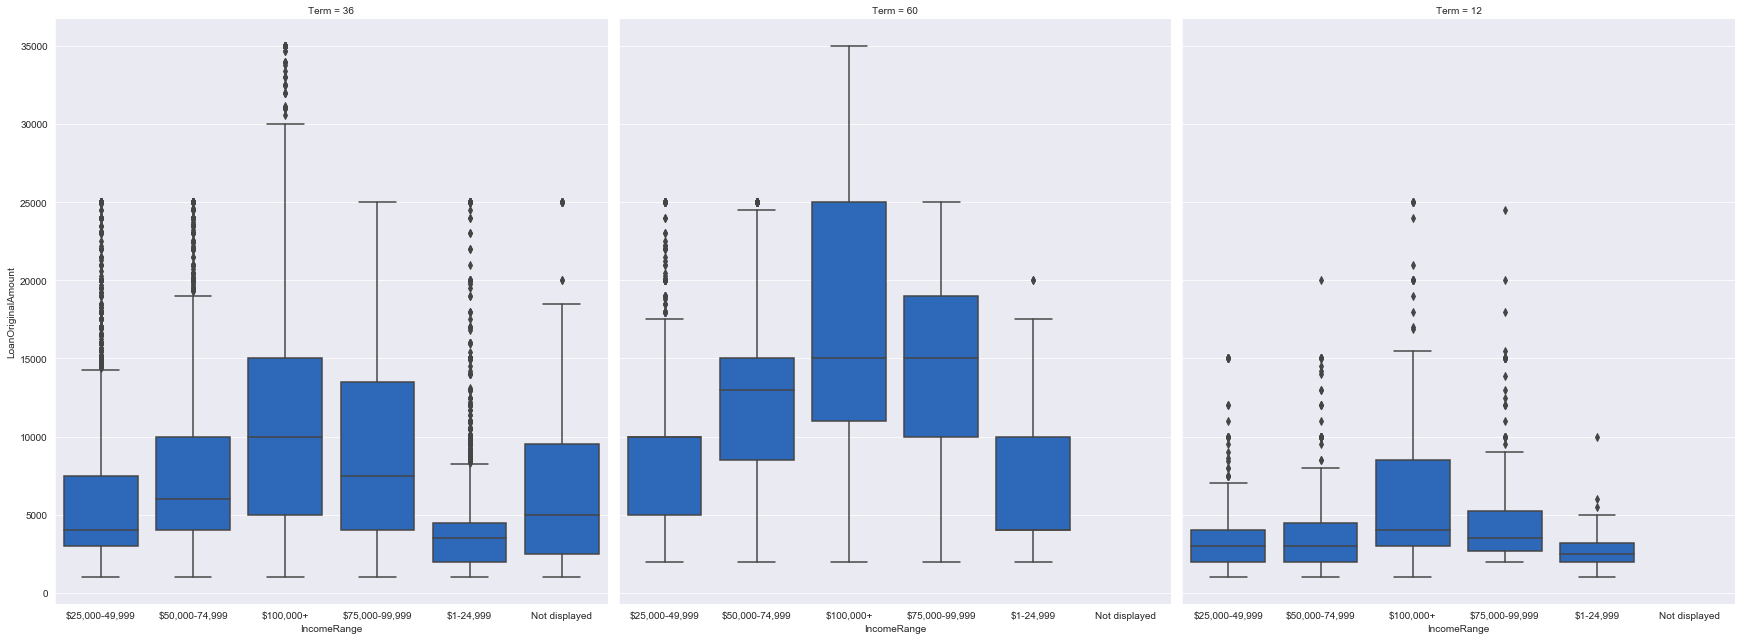

In [118]:
sns.catplot(
    data=loan, x="IncomeRange", y="LoanOriginalAmount", col="Term",
    kind="box", height=9, aspect=.9, color="#1765D0"
);

In [43]:
loan.head(1)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,Occupation,EmploymentStatus,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,Investors,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees
0,36,Completed,0.16516,0.158,Other,Self-employed,"$25,000-49,999",9425,330.43,258,11396.14,9425.0,1971.14


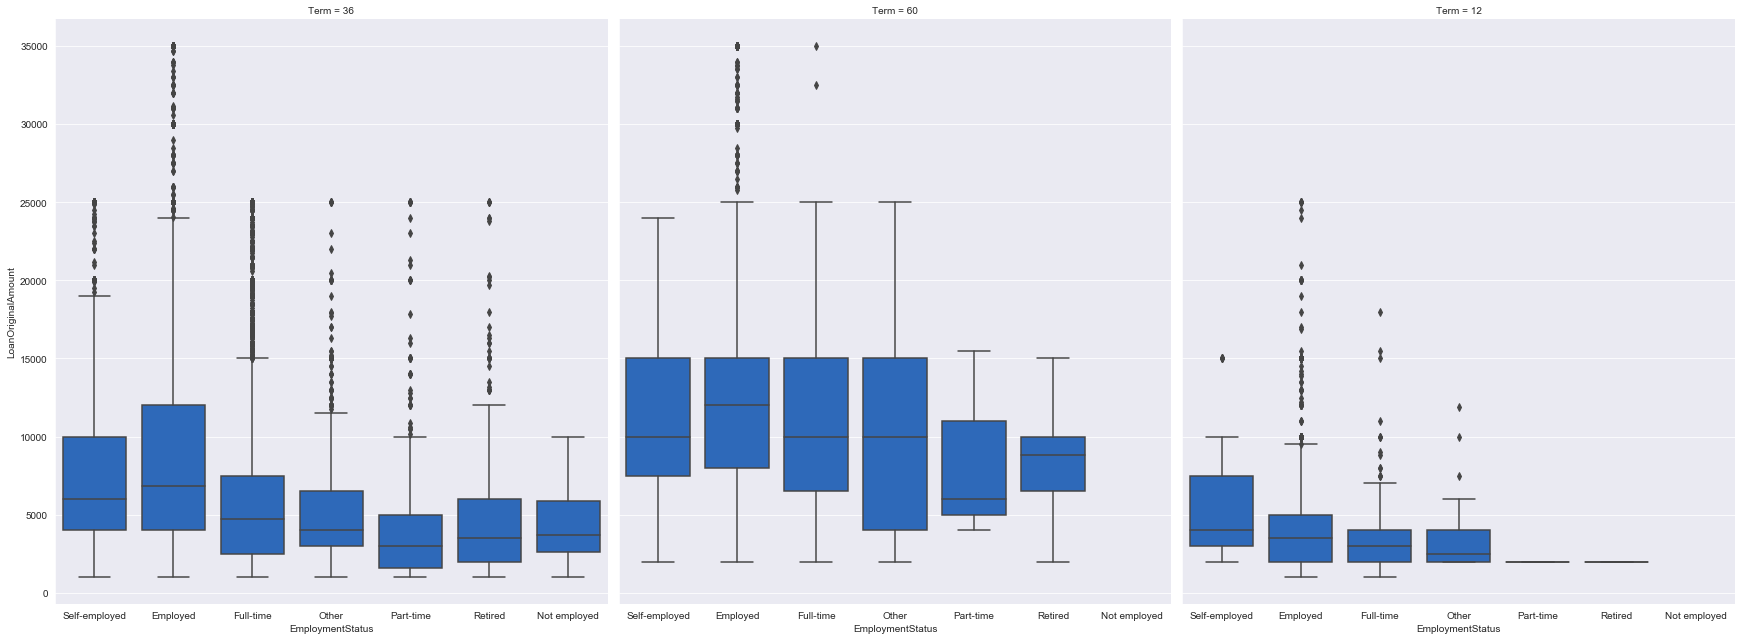

In [44]:
sns.catplot(
    data=loan, x="EmploymentStatus", y="LoanOriginalAmount", col="Term",
    kind="box", height=9, aspect=.9, color="#1765D0"
);

### 11. How does number of investors influence the Loan amount?

In [ ]:
sns.kdeplot(data = df, x="x", y="y", cmap="Reds", shade=True)

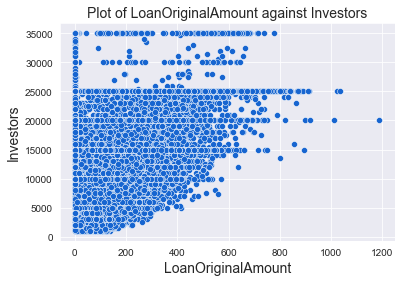

In [34]:
scatterplot(loan, 'Investors', 'LoanOriginalAmount')

> ### Observations
- It appears that 1-800 number of investors witnessed high loans of upto $35,000 

### 12. Does Monthly Loan Payment attract lower borrower rates?

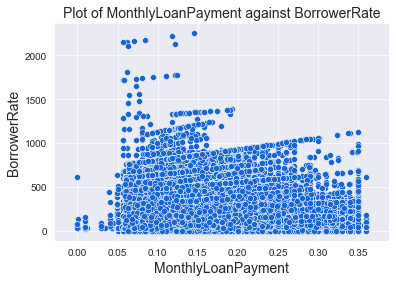

In [35]:
scatterplot(loan, 'BorrowerRate', 'MonthlyLoanPayment')

> ### Observations
- The Figure above suggest that increasing borrower rates are within a certain monthly loan payments and hence, implies that increase in the borrower rate based on the  monthly loan payment may depend on other factors.

## Multivariate Exploration

> Here, we create plots of three or more variables to investigate the data even
further.

### 13. Are there correlations amongst features?

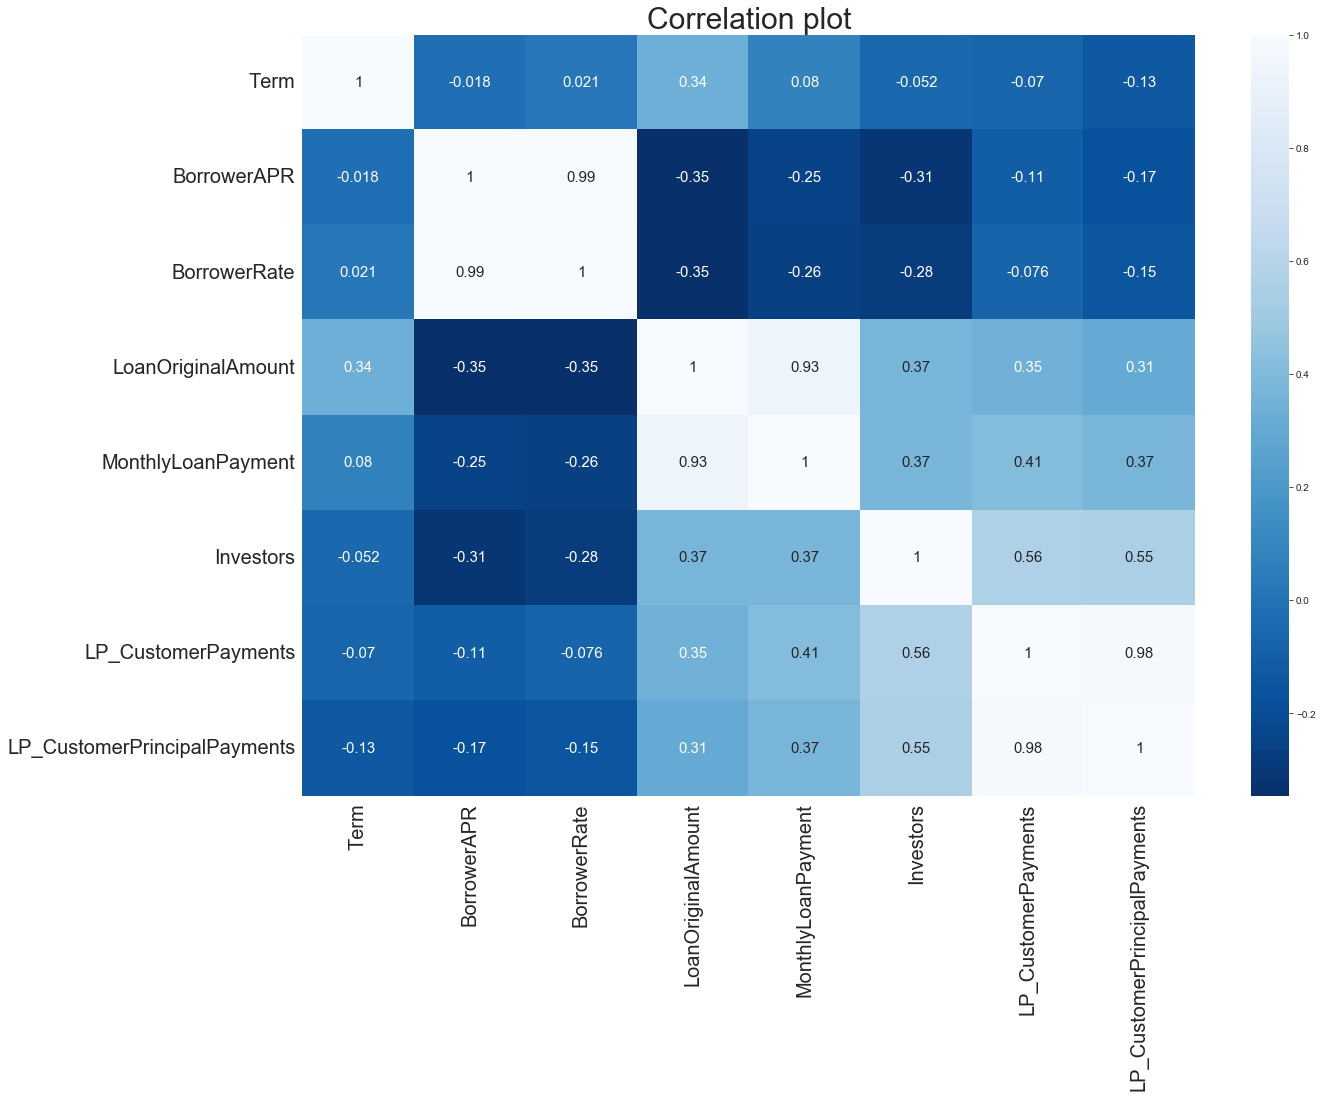

In [36]:
# make a correlation plot (heatmap)
corr_mx = loan.iloc[:,:-1].corr()
f, ax = plt.subplots(figsize=(20,14)) 
ax = sns.heatmap(corr_mx, annot=True, annot_kws={'size':15}, cmap='Blues_r')
plt.title("Correlation plot", fontsize=30)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 20);
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 20);

> ### Observations
- There appears a positive correlation between the LP customer principal payment and the Investors. This can suggest that as more investors invest in the company, more possible customer principal payments will be made. This is true because more invests will ensure more loans to be available.
- With correlation value of 0.018, it appears that irrespective of the number of Terms for borrowing loan, there's little to no impact on the borrower's rate
- With a relationship score of -0.35, borrower's annual rate will slightly decrease with an increase in Loan amount.
- With a high positive correlation between Monthly loan payment and the Loan amount shows that as monthly amounts are paid, more loans will be available for borrowing.
- There are multicollinearity observations between specific features such as; LP_CustomerPayments and LP_CustomerPrincipalPayments, BorrBorrowerAPR and BorrowerRate.

### 14. What are the Income ranges based on number of Investors, Loan Amount and Borrower Rate?

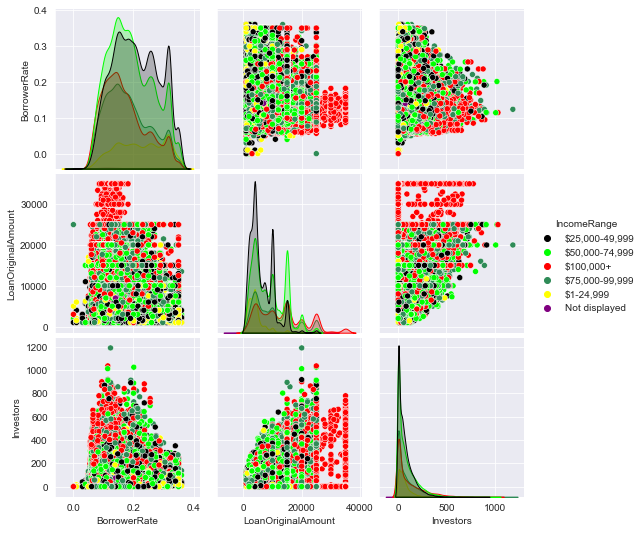

In [37]:
sns.pairplot(loan, vars=['BorrowerRate', 'LoanOriginalAmount', 'Investors'], 
             hue = 'IncomeRange', palette = ['black','lime', 'red', "seagreen",  "yellow", "purple"]);

> ### Observations
- Majority of Income ranges dominating the Investors vs Borrower rates are $50,000-74,999, 100,000+ and with little of 25,000-49,999.
- For the loan amounts vs Investors, 100,000+ and 50,000-74,999 dominate the relationship.

### 15. What are the Income ranges based on Term, Monthly loan payment?

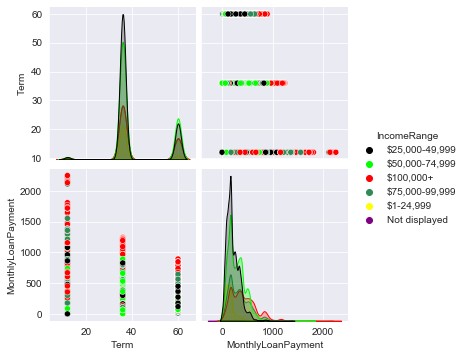

In [38]:
sns.pairplot(loan, vars=['Term', 'MonthlyLoanPayment'], 
             hue = 'IncomeRange', palette = ['black','lime', 'red', "seagreen",  "yellow", "purple"]);

> ### Observations
- For the Term, higher borrowers with Income ranges of $25,000-49,999 dominate the highest loan Terms while  the income ranges of 100,000+ dominate the lowest loan Terms.
- For the monthly loan payments, those with the income ranges of above 100,000 loans tends to make more monthly loan payments

## Conclusions
>  1 The highest loan appears to be $35,000


> 2. The **Current** loan status recorded the highest, followed by **Completed**.


> 3. Occupations of borrowers are majorly Professionals, Computer programmer, Excutive, Administrative assistant, Analyt etc.


> 4. The most frequent income ranges is between 25,000 - 49,999


> 5. It appears that amongst the top 10 borrowers occupations, four occupation namely; `Analyst`, `Attorney`, `Car Dealer`, and `Chemist`, happen to borrow loans of 35,000 dollars.


> 6. People with over 100,000 income ranges tend to borrow highest loans. 


> 7. There appears a positive correlation between the LP customer principal payment and the Investors. This can suggest that as more investors invest in the company, more possible customer principal payments will be made. This is true because more invests will ensure more loans to be available.


> 8. With correlation value of 0.018, it appears that irrespective of the number of Terms for borrowing loan, there's little to no impact on the borrower's rate


> 10. With a relationship score of -0.35, borrower's annual rate will slightly decrease with an increase in Loan amount


> 11. With a high positive correlation between Monthly loan payment and the Loan amount shows that as monthly amounts are paid, more loans will be available for borrowing.


> 12. There are multicollinearity observations between specific features such as; LP_CustomerPayments and LP_CustomerPrincipalPayments, BorrBorrowerAPR and BorrowerRate.


> 13. Majority of Income ranges dominating the Investors vs Borrower rates are $50,000-74,999, 100,000+ and with little of 25,000-49,999.


> 14. For the monthly loan payments, those with the income ranges of above 100,000 loans tends to make more monthly loan payments